<a href="https://colab.research.google.com/github/JoshuaBarsky/Projects/blob/main/Chess_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Chess from scratch**

Everything is created by Python Image Library (PIL) <u>per-pixel</u> manipulations using algebraic equations to create geometric shapes.

https://en.wikipedia.org/wiki/Python_Imaging_Library



This chess game will contain:


*   Board created from scratch (pixel level).
*   Chess pieces created from scratch (pixel level, <u>custom anti-aliasing created from scratch</u>).
*   Numbered positions (A1, B1, B2, etc.)
*   Allow only certain possible moves.
*   Simple interface to play.
*   Score keeping.
*   AI vs player.




In [131]:
import numpy as np
from numpy import unravel_index
from PIL import Image
from PIL import ImageDraw

In [187]:
def resetBoard(positions):
  #white pieces
  for i in range(8):
    positions[1][i] = 1 #pawn
  for i in range(8):
    if i==0 or i == 7:
      positions[0][i] = 2
  for i in range(8):
    if i==1 or i == 6:
      positions[0][i] = 3
  for i in range(8):
    if i==2 or i == 5:
      positions[0][i] = 4
  positions[0][3] = 6 #king
  positions[0][4] = 5 #queen
  #black pieces
  for i in range(8):
    positions[6][i] = 7 #pawn
  for i in range(8):
    if i==0 or i == 7:
      positions[7][i] = 8 #rook
  for i in range(8):
    if i==1 or i == 6:
      positions[7][i] = 9 #knight
  for i in range(8):
    if i==2 or i == 5:
      positions[7][i] = 10 #bishop
  positions[7][3] = 12 #king
  positions[7][4] = 11 #queen

  return positions

In [117]:
print(positions)

[[ 2.  3.  4.  6.  5.  4.  3.  2.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 7.  7.  7.  7.  7.  7.  7.  7.]
 [ 8.  9. 10. 12. 11. 10.  9.  8.]]


In [118]:
positions = np.zeros((8,8))
#0 = Empty
#1 = Pawn (w)
#2 = Rook (w)
#3 = Knight (w)
#4 = Bishop (w)
#5 = Queen (w)
#6 = King (w)
#7 = Pawn (b)
#8 = Rook (b)
#9 = Knight (b)
#10 = Bishop (b)
#11 = Queen (b)
#12 = King (b)
positions = resetBoard(positions)

In [197]:
def boardImage(positions):
  pixels = np.random.randint(0,256,(721,721,3), dtype = np.uint8)

  for i in range(len(pixels)):
    for k in range(len(pixels)):
      pixels[i][k] = (200,200,200)
    for j in range(9):
      pixels[i][j*90] = (0,0,0)

  for i in range(4):  #makes dark squares
    for k in range(90):
      for j in range(89):
        pixels[i*180+k][j+1] = (100,100,100)
        pixels[i*180+k][j+181] = (100,100,100)
        pixels[i*180+k][j+361] = (100,100,100)
        pixels[i*180+k][j+541] = (100,100,100)

  for i in range(4):  #makes dark squares
    for k in range(90):
      for j in range(89):
        pixels[i*180+k+90][j+91] = (100,100,100)
        pixels[i*180+k+90][j+271] = (100,100,100)
        pixels[i*180+k+90][j+451] = (100,100,100)
        pixels[i*180+k+90][j+631] = (100,100,100)

  for i in range(9):
    for j in range(len(pixels)):
      pixels[i*90][j] = (0,0,0)

  for i in range(len(positions)):
    for j in range(len(positions)):
      #white pieces
      if positions[i][j] == 0.0:
        pixels = drawEmpty(i,j, pixels, 0)
      if positions[i][j] == 1.0:
        pixels = drawPawn(i,j, pixels, 0)
      if positions[i][j] == 2.0:
        pixels = drawRook(i,j, pixels, 0)
      if positions[i][j] == 3.0:
        pixels = drawKnight(i,j, pixels, 0)
      if positions[i][j] == 4.0:
        pixels = drawBishop(i,j, pixels, 0)
      if positions[i][j] == 5.0:
        pixels = drawQueen(i,j, pixels, 0)
      if positions[i][j] == 6.0:
        pixels = drawKing(i,j, pixels, 0)
      #black pieces
      if positions[i][j] == 7.0:
        pixels = drawPawn(i,j, pixels, 1)
      if positions[i][j] == 8.0:
        pixels = drawRook(i,j, pixels, 1)
      if positions[i][j] == 9.0:
        pixels = drawKnight(i,j, pixels, 1)
      if positions[i][j] == 10.0:
        pixels = drawBishop(i,j, pixels, 1)
      if positions[i][j] == 11.0:
        pixels = drawQueen(i,j, pixels, 1)
      if positions[i][j] == 12.0:
        pixels = drawKing(i,j, pixels, 1)

  return pixels

In [120]:
def drawEmpty(i,j, pixels, color):
  pixels[i*90+45][j*90+45] = 0
  return pixels

In [121]:
def drawPawn(i, j, pixels, color):
  #draw black pieces
  if color == 0:
    for k in range(-10, 11, 1):
      y = np.sqrt(10**2 - k**2)
      pixels[i*90+45-int(y)][j*90+45+k] = 0
    for k in range(-10, 11, 1):
      y = np.sqrt(10**2 - k**2)
      pixels[i*90+45+int(y)][j*90+45+k] = 0
  #draw white pieces
  if color == 1:
    for k in range(-10, 11, 1):
      y = np.sqrt(10**2 - k**2)
      pixels[i*90+45-int(y)][j*90+45+k] = 255
    for k in range(-10, 11, 1):
      y = np.sqrt(10**2 - k**2)
      pixels[i*90+45+int(y)][j*90+45+k] = 255
  return pixels

In [122]:
def drawRook(i,j, pixels, color):
  #draw black pieces
  if color == 0:
    for k in range(21):
      pixels[i*90+35+k][j*90+35] = 0
      pixels[i*90+35+k][j*90+55] = 0
    for k in range(21):
      pixels[i*90+35][j*90+35+k] = 0
      pixels[i*90+55][j*90+35+k] = 0
    #draw white pieces
  if color == 1:
    for k in range(21):
      pixels[i*90+35+k][j*90+35] = 255
      pixels[i*90+35+k][j*90+55] = 255
    for k in range(21):
      pixels[i*90+35][j*90+35+k] = 255
      pixels[i*90+55][j*90+35+k] = 255
  return pixels

In [123]:
def drawKnight(i,j, pixels, color):
  #draw black pieces
  if color == 0:
    for k in range(21):
      pixels[i*90+35+k][j*90+54-k] = 0
      pixels[i*90+35+k][j*90+56-k] = 0
    for k in range(21):
      pixels[i*90+35][j*90+35+k] = 0
      pixels[i*90+55][j*90+35+k] = 0
  #draw white pieces
  if color == 1:
    for k in range(21):
      pixels[i*90+35+k][j*90+54-k] = 255
      pixels[i*90+35+k][j*90+56-k] = 255
    for k in range(21):
      pixels[i*90+35][j*90+35+k] = 255
      pixels[i*90+55][j*90+35+k] = 255

  return pixels

In [124]:
def drawBishop(i,j, pixels, color):
  #draw black piece
  if color == 0:
    for k in range(11):
      pixels[i*90+45+k][j*90+35+k] = 0
      pixels[i*90+45+k][j*90+55-k] = 0
    for k in range(11):
      pixels[i*90+35+k][j*90+45+k] = 0
      pixels[i*90+35+k][j*90+45-k] = 0
  #draw white piece
  if color == 1:
    for k in range(11):
      pixels[i*90+45+k][j*90+35+k] = 255
      pixels[i*90+45+k][j*90+55-k] = 255
    for k in range(11):
      pixels[i*90+35+k][j*90+45+k] = 255
      pixels[i*90+35+k][j*90+45-k] = 255
  return pixels

In [125]:
def drawQueen(i,j,pixels, color): #draws queen symbol
  #draw black pieces
  if color == 0:
    for k in range(-17, 18, 1):  #makes curve of crown y = sqrt(r^2 - x^2)
      y = np.sqrt(20**2 - k**2)
      pixels[i*90+45-int(y)+20][j*90+45+k] = 0
    for k in range(-17, 18, 1):  #makes curve of crown
      y = np.sqrt(20**2 - k**2)
      pixels[i*90+45-int(y)+22][j*90+45+k] = 0

    for k in range(-17, 18, 1): #makes spikes of the crown
      y = np.sqrt(20**2 - k**2)
      if k%4 == 0:
        for u in range(13):
          pixels[i*90+45-int(y)+20-u][j*90+45+k] = 0
  #draw white pieces
  if color == 1:
    for k in range(-17, 18, 1):  #makes curve of crown y = sqrt(r^2 - x^2)
      y = np.sqrt(20**2 - k**2)
      pixels[i*90+45-int(y)+20][j*90+45+k] = 255
    for k in range(-17, 18, 1):  #makes curve of crown
      y = np.sqrt(20**2 - k**2)
      pixels[i*90+45-int(y)+22][j*90+45+k] = 255

    for k in range(-17, 18, 1): #makes spikes of the crown
      y = np.sqrt(20**2 - k**2)
      if k%4 == 0:
        for u in range(13):
          pixels[i*90+45-int(y)+20-u][j*90+45+k] = 255
  return pixels

In [126]:
def drawKing(i,j,pixels, color): #draws King symbol
  #draw black pieces
  if color == 0:
    for k in range(-17, 18, 1):  #makes curve of crown y = sqrt(r^2 - x^2)
      y = np.sqrt(20**2 - k**2)
      pixels[i*90+45-int(y)+20][j*90+45+k] = 0


    for k in range(-17, 18, 1): #makes spikes of the crown
      y = np.sqrt(20**2 - k**2)
      if k%8 == 0:
        for u in range(11):
          pixels[i*90+45-int(y)+20-u][j*90+45+k] = 0
  #draw white pieces
  if color == 1:
    for k in range(-17, 18, 1):  #makes curve of crown y = sqrt(r^2 - x^2)
      y = np.sqrt(20**2 - k**2)
      pixels[i*90+45-int(y)+20][j*90+45+k] = 255


    for k in range(-17, 18, 1): #makes spikes of the crown
      y = np.sqrt(20**2 - k**2)
      if k%8 == 0:
        for u in range(11):
          pixels[i*90+45-int(y)+20-u][j*90+45+k] = 255

  return pixels

In [127]:
def addPositionText(img):
  for i in range(8):
    for j in range(8):
      A1 = ImageDraw.Draw(img)
      A1.text((90*j+75, 90*i+2), "{}{}".format(chr(65+i), j+1), fill=(0, 0, 0))

  return img

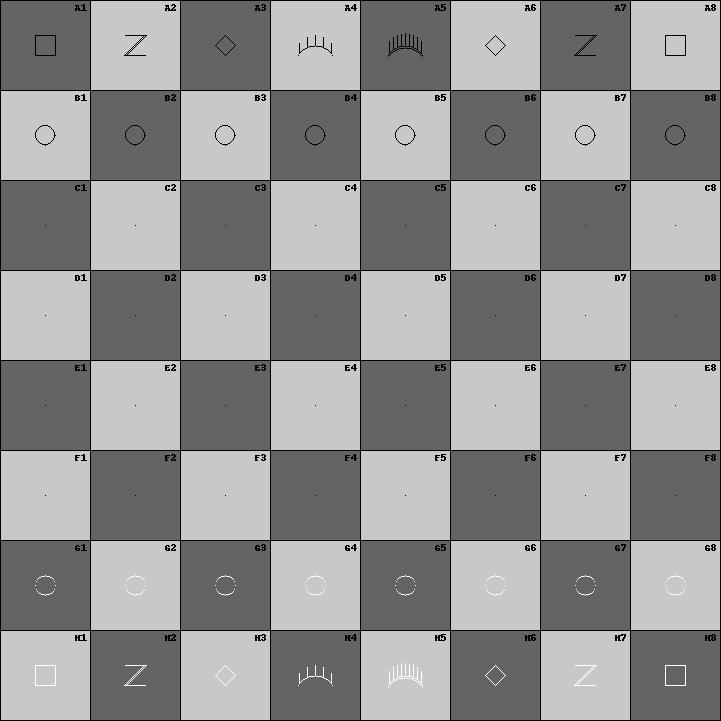

In [288]:
img = Image.fromarray(boardImage(positions))
img = addPositionText(img)
img = draw_anti_aliasing_pawn(img, positions) #anti-aliasing
img.show()

#display(img)
#img.save('Chess.png')

In [287]:
#anti-aliasing pawn shape

size = 20

x_arr = np.linspace(-1,1,size)
y_arr = x_arr
xy_arr = np.add.outer(x_arr**2, y_arr**2)

circ_arr = (1/np.abs(xy_arr - 1))
circ_arr_weighted = circ_arr.astype(np.uint8)

def scale(A):
  m = 0
  for i in range(len(A)):
    if max(A[i] > m):
      m = max(A[i])
  for i in range(len(A)):
    for j in range(len(A)):
      A[i][j] = ((A[i][j])*255)/m
  return A

def swap_scale(A):
  maxIndex = A.argmax()
  return -np.array(A) + A[unravel_index(A.argmax(), A.shape)[0]][unravel_index(A.argmax(), A.shape)[1]]

def darken(A, background):
  for i in range(len(A)):
    for j in range(len(A)):
      if A[i][j] > 230:
        A[i][j] = background
      elif A[i][j] < 230:
        A[i][j] = 0
  return A

def anti_aliasing(pawn_arr, background):
    pawn_arr = scale(pawn_arr.astype(np.uint8))
    pawn_arr = swap_scale(pawn_arr)
    if background == 0:
      pawn_arr = darken(pawn_arr, 200)
    else:
      pawn_arr = darken(pawn_arr, 100)
    return pawn_arr

light_square = anti_aliasing(circ_arr, 0)
dark_square = anti_aliasing(circ_arr, 1)

def draw_anti_aliasing_pawn(img, positions):
  for i in range(len(positions)):
    for j in range(len(positions)):
      if (positions[i][j] == 1):
        if (i%2 == 0 and j%2 == 0):
          img.paste(im2, (35+j*90, 35+i*90))
        if (i%2 == 1 and j%2 == 1):
          img.paste(im2, (35+j*90, 35+i*90))
        if (i%2 == 0 and j%2 == 1):
          img.paste(im1, (35+j*90, 35+i*90))
        if (i%2 == 1 and j%2 == 0):
          img.paste(im1, (35+j*90, 35+i*90))
  return img

im1 = Image.fromarray(light_square)
im2 = Image.fromarray(dark_square)
im1.show()
im2.show()